# ***Level 2: Project 2: Wine Quality Prediction***

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Loading the dataset
d = pd.read_csv('/content/WineQT - infobyte.csv')
print(d.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [ ]:
# Basic exploration of dataset
print(d.info())
print("------------------------------")
print("Descriptive Statistics:")
print(d.describe())
print("------------------------------")
print("Checking for null values:")
print(d.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None
------------------------------
Descriptive Statistics:
       fixed ac

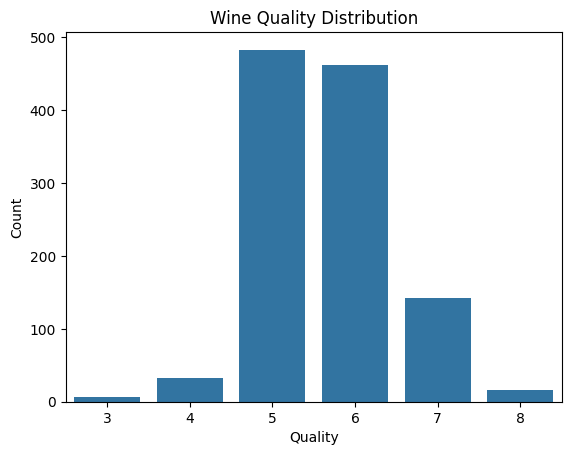

In [ ]:
# Data visualization
sns.countplot(x='quality', data=d)
plt.title('Wine Quality Distribution')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

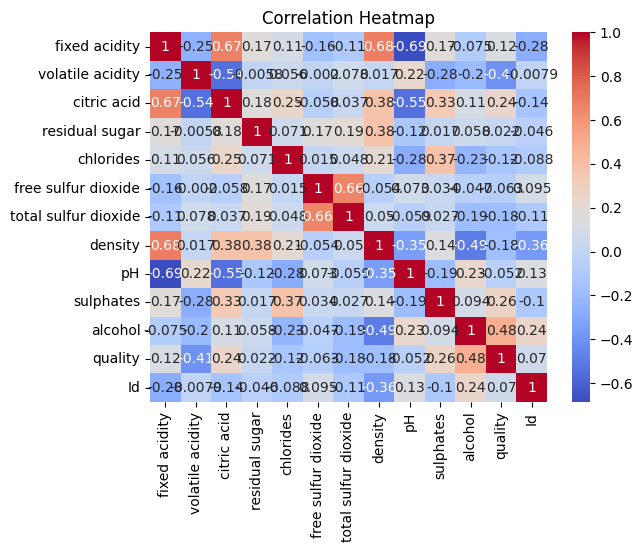

In [ ]:
# Correlation heatmap
sns.heatmap(d.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Feature Engineering

# Since id is not required, we remove that from dataset
d = d.drop(columns = 'Id')

# Separate features and target
x = d.drop(columns='quality', axis=1)
y = d['quality']

In [ ]:
# Data Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train_scaled, y_train)
rf_preds = rf_classifier.predict(x_test_scaled)

print("Random Forest Classifier:")
print("\nAccuracy Score:\n", accuracy_score(y_test, rf_preds))
print("\nClassification Report:\n", classification_report(y_test, rf_preds))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_preds))

Random Forest Classifier:

Accuracy Score:
 0.6986899563318777

Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.71      0.80      0.75        96
           6       0.68      0.66      0.67        99
           7       0.72      0.69      0.71        26
           8       0.00      0.00      0.00         2

    accuracy                           0.70       229
   macro avg       0.42      0.43      0.43       229
weighted avg       0.67      0.70      0.68       229


Confusion Matrix:
 [[ 0  3  3  0  0]
 [ 0 77 18  1  0]
 [ 0 28 65  6  0]
 [ 0  0  8 18  0]
 [ 0  0  2  0  0]]


In [ ]:
# Support Vector Classifier
from sklearn.svm import SVC
svc = SVC(random_state=42)
svc.fit(x_train_scaled, y_train)
svc_pred = svc.predict(x_test_scaled)

print("Support Vector Classifeir:\n")
print("\nAccuracy Score:\n", accuracy_score(y_test, svc_pred))
print("\nClassification Report:\n", classification_report(y_test, svc_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, svc_pred))

Support Vector Classifeir:


Accuracy Score:
 0.6375545851528385

Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.70      0.74      0.72        96
           6       0.59      0.69      0.64        99
           7       0.54      0.27      0.36        26
           8       0.00      0.00      0.00         2

    accuracy                           0.64       229
   macro avg       0.37      0.34      0.34       229
weighted avg       0.61      0.64      0.62       229


Confusion Matrix:
 [[ 0  3  3  0  0]
 [ 0 71 25  0  0]
 [ 0 26 68  5  0]
 [ 0  1 18  7  0]
 [ 0  0  1  1  0]]


In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(random_state=42)
sgd.fit(x_train_scaled, y_train)
sgd_preds = sgd.predict(x_test_scaled)

print("Stochaistic Gradient Descent\n")
print("Accuracy:\n", accuracy_score(y_test, sgd_preds))
print("\nclassification_report:\n",classification_report(y_test, sgd_preds))


Stochaistic Gradient Descent

Accuracy:
 0.5021834061135371

classification_report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         6
           5       0.57      0.80      0.67        96
           6       0.53      0.24      0.33        99
           7       0.30      0.54      0.39        26
           8       0.00      0.00      0.00         2

    accuracy                           0.50       229
   macro avg       0.24      0.26      0.23       229
weighted avg       0.51      0.50      0.47       229

